In [1]:
pip install --quiet git+https://github.com/Australian-Text-Analytics-Platform/atap_widgets.git@a93db3674590320bf5de61748641c20d05fb9c9f

Note: you may need to restart the kernel to use updated packages.


In [1]:
# just pathing - ignore this
import os
while  not 'juxtorpus' in os.listdir():
    os.chdir('../')
assert 'juxtorpus' in os.listdir(), f"Working directory should be at juxtorpus. But at {os.getcwd()}"
f"Working directory: {os.getcwd()}"

'Working directory: /Users/hcha9747/workspace/juxtorpus'

# Australian Text Analytics Platform (ATAP)
The Australian Text Analytics Platform aims to bring computational text analysis to the hands of students and researchers with little coding experience through easy to use widgets and library of functions on jupyter notebooks.

### 1. Create a Corpus

In [3]:
import pandas as pd
from juxtorpus.corpus import Corpus

# corpus = Corpus.from_dataframe(pd.read_excel("notebooks/workshops/A.debate_clean.xlsx"), col_doc='text')
corpus = Corpus.from_dataframe(pd.read_csv("notebooks/demos/taster_workshop/twcs_sel.csv"), col_doc='text')

In [4]:
corpus.summary()

,
Name,glistening-hound
Parent,
Corpus Type,Corpus
Number of Documents,283489
Number of Total Words,4359630
Size of Vocabulary,172242
mean Words per Document,15
min Words per Document,1
max Words per Document,62
metas,"tweet_id, author_id, inbound, created_at, resp..."


There are about 118 documents and we can see that the mean number of words are only 82 so these are all short relatively short documents.

Let's quickly see what this corpus is about.

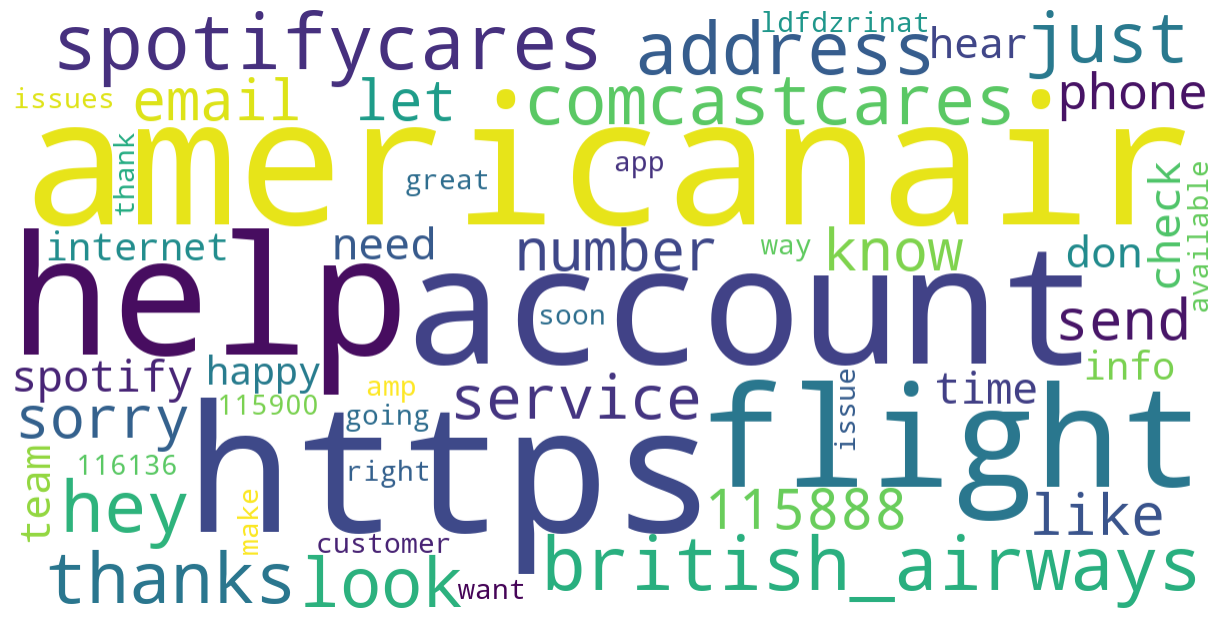

In [5]:
corpus.viz.wordcloud('tfidf')

In [11]:
sample = corpus.sample(100)

# Concordance
Concordance is one of the linguistic tools under ATAP. **It lets you visualise a context window around a target word or words.**

Let's see how we can use it after creating a `Corpus`.

In [20]:
from atap_widgets.concordance import ConcordanceLoader

concordance = ConcordanceLoader(type='corpus', df_input=sample)

In [21]:
concordance.show()

In [19]:
sample_df = sample.to_dataframe().reset_index(drop=True)
sample_df['text'] = sample_df['document']
sample_df = sample_df.astype(str)
ConcordanceLoader(type='dataframe', df_input=sample_df).show()

In [23]:
sample_df = sample.to_dataframe().rename({sample.COL_DOC: 'text'}, axis=1)
sample_df.reset_index(inplace=True, drop=True)
ConcordanceLoader(type='dataframe', df_input=sample_df).show()